### Supervised Learning
## Project: Finding Donors for *CharityML*

CharityML is a fictitious charity organization located in the heart of Silicon Valley that was established to provide financial support for people eager to learn machine learning. After nearly 32,000 letters sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail. Your goal will be evaluate and optimize several different supervised learners to determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately **predicts** whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations. **Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.**  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

[Features]

- **age:** Age
- **workclass:** Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **education_level:** Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- **education-num:** Number of educational years completed
- **marital-status:** Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** Sex (Female, Male)
- **capital-gain:** Monetary Capital Gains
- **capital-loss:** Monetary Capital Losses
- **hours-per-week:** Average Hours Per Week Worked
- **native-country:** Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

[Target Variable]

- **income:** Income Class (<=50K, >50K)

----
## 1) Exploring the Data
Load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("C:/Users/Minkun/Desktop/classes_1/NanoDeg/2.MLND+SDC/L2. SupervisedLearning/data2/census.csv")

# Success - Display the first 5 record
display(data.head(5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


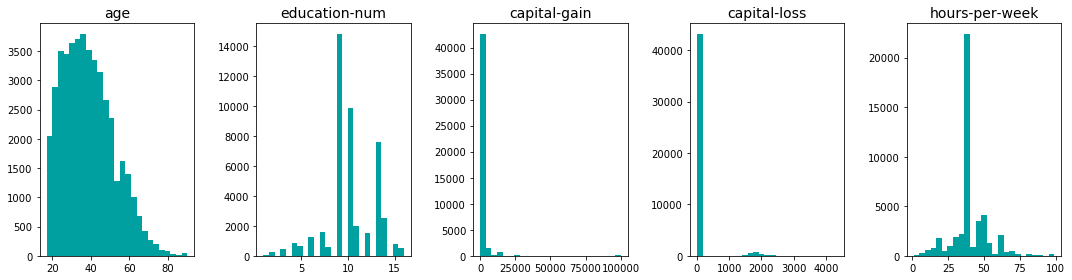

In [200]:
#HIST-numeric

fig = plt.figure(figsize = (15,4))

for i, feature in enumerate(['age','education-num','capital-gain','capital-loss','hours-per-week']):
    ax = fig.add_subplot(1, 5, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title('%s'%(feature), fontsize = 14)
    
fig.tight_layout()
fig.show()

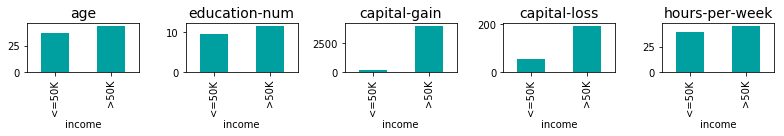

In [176]:
# Category: income
# significant difference is seen in the variables:'captial-gain/loss'

fig = plt.figure(figsize = (11,2))

for i, feature in enumerate(['age','education-num','capital-gain','capital-loss','hours-per-week']):
    ax = fig.add_subplot(1, 5, i+1)
    data.groupby('income')[feature].mean().plot(kind='bar', color = '#00A0A0')
    ax.set_title('%s'%(feature), fontsize = 14)
    
fig.tight_layout()
fig.show()

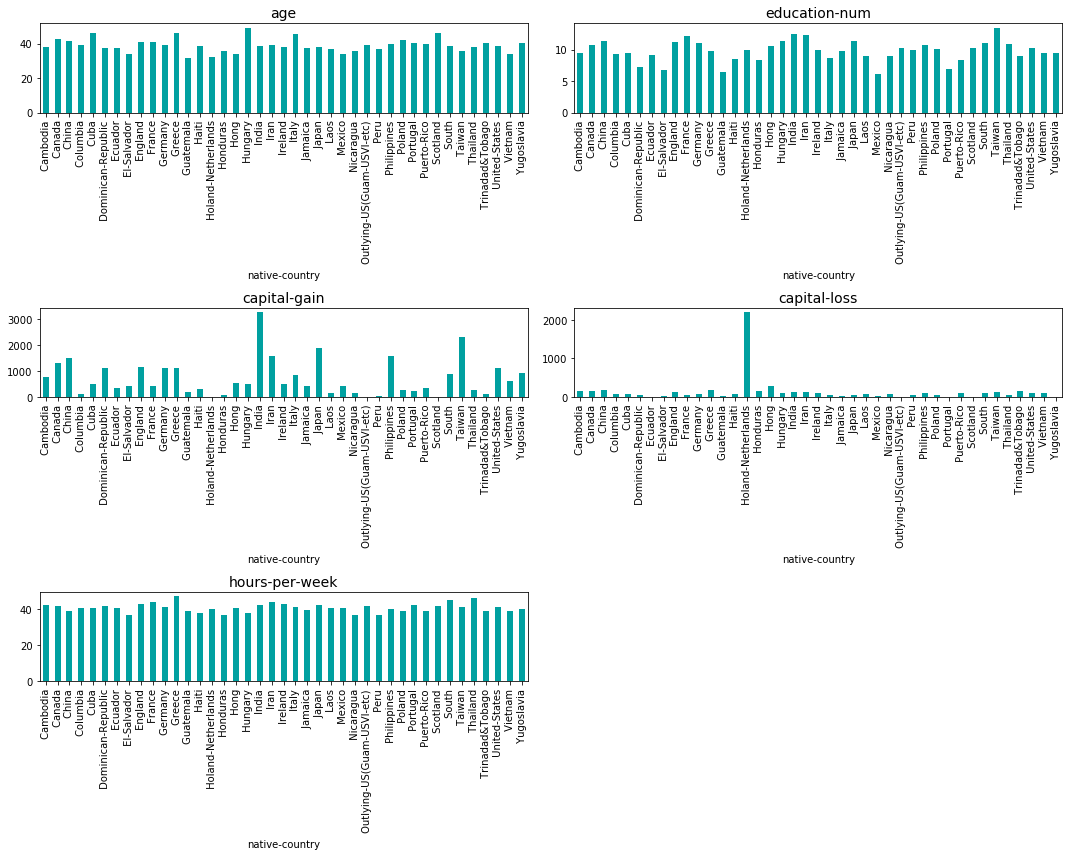

In [193]:
# Category: country

fig = plt.figure(figsize = (15,12))

for i, feature in enumerate(['age','education-num','capital-gain','capital-loss','hours-per-week']):
    ax = fig.add_subplot(3, 2, i+1)
    data.groupby('native-country')[feature].mean().plot(kind='bar', color = '#00A0A0')
    ax.set_title('%s'%(feature), fontsize = 14)
    
fig.tight_layout()
fig.show()

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. Compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [220]:
data.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [37]:
type(data.query('income == ">50K"').shape[0])

int

In [218]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data.query('income == ">50K"').shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data.query('income == "<=50K"').shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


### ---> The Target Class is imbalanced.
the ratio of individuals making more than $50k vs those making less are not in proportion

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

https://towardsdatascience.com/what-metrics-should-we-use-on-imbalanced-data-set-precision-recall-roc-e2e79252aeba

> With a large number of negative samples — **Precision or Recall** is better because it is not affected by a large number of negative samples. 

> With a large number of positive samples — **RocCurve** is better because the precision and recall would reflect mostly the ability of prediction of the positive class and not the negative class which will naturally be harder to detect due to the smaller number of samples.

> With a balanced - **RocCurve**

----
## 2) Preparing the Data **
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### > Transforming Skewed Continuous Features <
> A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not **properly normalized**. With the census dataset two features fit this description: `'capital-gain'` and `'capital-loss'`. 

Plot a histogram of these two features. Note the range of the values present and how they are distributed.

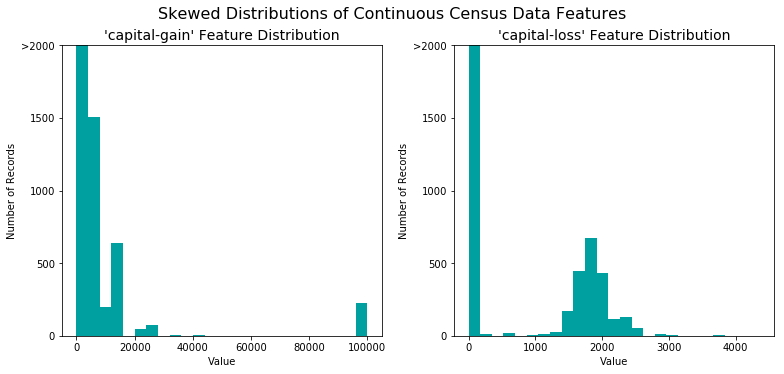

In [39]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. **Using a logarithmic transformation significantly reduces the range of values caused by outliers.** Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

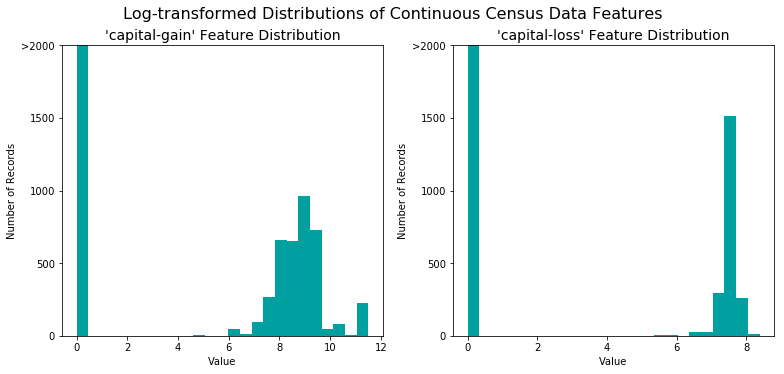

In [44]:
# features_log_transformed

# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']

features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### > Normalizing Numerical Features <
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on **numerical features**. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, **normalization ensures that each feature is treated equally when applying supervised learners.** 

Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [45]:
# features_log_minmax_transform

# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler() Transforms features by scaling each feature to a given range.
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default: feature_range=(0, 1), copy=True

numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table above, we can see there are several features for each record that are non-numeric. **Typically, learning algorithms expect input to be numeric**, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform **one-hot encoding** on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [59]:
income_raw.head(10)

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
5    <=50K
6    <=50K
7     >50K
8     >50K
9     >50K
Name: income, dtype: object

In [57]:
income_new = pd.get_dummies(income_raw)['>50K']

In [60]:
income_new.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    1.0
8    1.0
9    1.0
Name: >50K, dtype: float64

In [221]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies() 
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values where '>50K' is 1. 
income = pd.get_dummies(income_raw)['>50K']

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


In [ ]:
################################################################################################################################

> We can also use `LabelEncoder()` as an alternative in case where we have a huge number of output classes. 

Multi Class predictions 

(integer encode)
```
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
income = encoder.fit_transform(income_raw)

#or

income = data["income"].astype('category')
data["n_income"] = income.cat.codes

```
(one-hot encode)
```
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
occ = encoder.fit_transform(features_raw['occupation'])
pd.DataFrame(occ, columns = occ.classes_)

#or

pd.get_dummies(features_raw)

#or

pd.get_dummies(features_raw, columns=['occupation', 'relationship'], prefix=['occ','rel'])
```
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

http://scikit-learn.org/stable/modules/multiclass.html

> Why One-Hot Encode Data in Machine Learning?

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

> Guide to Encoding Categorical Values in Python

http://pbpython.com/categorical-encoding.html

In [ ]:
################################################################################################################################

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Perform this split.

In [62]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

C:\Users\Minkun\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training set has 36177 samples.
Testing set has 9045 samples.


----
## 3) Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in **predicting who makes more than \$50,000 accurately.** It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (\beta^2 + 1) \cdot \frac{precision \cdot recall}{\left(\beta^2 \cdot precision \right) + (1 \cdot recall)} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - naive predictor Performace
- Q. If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? (assign your results to `'accuracy'` and `'fscore'` to be used later).


- [Note]: The purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

> When we have a model that always predicts '1' (i.e. the individual makes more than 50k..so they are all positive) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a **False Positive**; therefore our denominator in this case is the total number of records we have in total. 

> Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

** Answer: ** very small accuracy(0.2478) which becomes precision, and very small fscore(0.2917) which is closer to the smaller one between precision and recall. 

In [71]:
'''
TP = np.sum(income) ### Counting the '1's as this is the naive case. Note that 'income' is the 'income_raw' data encoded to
numerical values done in the data preprocessing step.

FP = income.count() - TP ### Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = ((1+(0.5)**2)*precision*recall)/(((0.5)**2)*precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print('of course, recall: {}'.format(recall))
print("Precision: {:.4f}".format(precision))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]
of course, recall: 1.0
Precision: 0.2478


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- 1.Describe one real-world application in industry where the model can be applied. 
- 2.What are the strengths of the model; when does it perform well?
- 3.What are the weaknesses of the model; when does it perform poorly?
- 4.What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **
> Structure your answer in the same format as above, with 4 parts for each of the three models you pick. Please include references with your answer.

** Answer:**
- [Logistic Regression]:
  - 1) APPLICATION:
    - For "Binary, or Multinomial Classification": When predicting students' school acceptance(Y/N) based on his/her academic records(SAT-results, GPA, numeric/categoric, etc), or when we have "customer churn" datasets(skewed in general). They are typically in this group because when we collect the training set, among a million customers during a particular time period, there would be very few who have actually churned.  
  - 2) STRENGTH:
    - It provides probability estimates. We can get the conditional probabilities (we can get ranking instead of classification as well).  
    - The linear combination of parameters β and the input vector is easy to compute, so easy to interpret. 
    - When our explanatory variables are binary, we can partition our input space by outcome quite well.
    - It works OK even if some of the variables are correlated.
    - When the training data size is less relative to the features(10K records and more than 100K features), Lasso(L1-LOSS) and Ridge(L2-LOSS) regression will help in improving the results. It is pretty robust to noise and we can avoid overfitting and even do feature selection by using L1,2 regularization.
    - **It is good at handling skewed datasets.**
  - 3) WEAKNESS:
    - Its hypothesis space is limited: we can't solve non-linear problems with logistic regression since it's decision surface is linear.
    - With the small training data, model estimates may overfit the data.
###    - Not good for too many levels in variables ?????
###    - It is not a good option for incremental learning ????? 
  - 4) WHY?:
    - The census dataset has many data points(more than 40k records) and although it does not have many features, each feature consists of multiple categories. There is a little correlation between features. Plus, the shapes of the features("capital_gain","capital_loss") are skewed. 

>Reference: https://www.quora.com/What-are-the-advantages-of-different-classification-algorithms


- [GaussianNB]:
  - 1) APPLICATION:
    - For "Binary Classification": When future emails come, using NaiveBayes, we can combine the features(probabilistic?) of previous emails and guess(or offer the final odds) if they are spam or not(Y/N). 
  - 2) STRENGTH: 
    - If the conditional independence assumption actually holds, Naive Bayes is great for dealing with 'text' or multiple classes. Because it treats each unique word as a feature independently (since the typical person’s vocabulary is many thousands of words), this makes for a large number of features, and it gives better performance than an SVM.
    - Naive Bayes is simple and does not need a lot of data to perform well and will converge quicker than other discriminative models.
    - The NB models cannot represent complex behavior so it won’t get into overfitting.
    - It Works well even with less training data, as the estimates are based on the joint density function.
    - If a data instance has a missing value for an attribute, it can be ignored while preparing the model, and ignored when a probability is calculated for a class value.
    - Even when the independence assumption is violated and there are clear known relationships between attributes, it works anyway.
  - 3) WEAKNESS:
    - When our data is dynamic and keeps changing, NB can't adapt quickly to the changes.
    - It only works when we have small training data set and relatively small features(dimensions). If we have too huge feature list, the model may not give us a good accuracy, because the likelihood would be distributed and may not follow the Gaussian.
    - The performance can degrade if the data contains highly correlated features because the highly correlated features are voted for twice in the model, over inflating their importance.
    - In the case where a categorical attribute has a value that was not observed in training, the model will assign a 0 probability and be unable to make a prediction.
  - 4) WHY?:
    - Our census dataset does not have too many features that have mutiple classes of string which are not ordinal. The training set size would be small enough too. Features are less related to each other. 

>Reference: https://machinelearningmastery.com/better-naive-bayes/
  
  
- [Ensemble Methods]:
  - 1) APPLICATION:
    - For "Non-Binary Classification": When predicting the apps that the future users with different backgrounds would download, we build a DecisionTree classifier based on the features of each different app, but in order to further enhance the performance of DecisionTree model, we use Ensemble Methods that produce one optimal predictive model based on the aggregated results of the sampled Decision Trees. 
  - 2) STRENGTH:
    - When our data is dynamic and keeps changing, we can rebuild the model every time. By adding an additional question, we can greater define the Yes and No classes.
    - It works well on the data that has categorical variables with lots of levels.
  - 3) WEAKNESS:
    - Because of its huge size, if not carefully built, it results in overfitting.
    - When our model needs to be interpretable, Ensemble classifier makes explanations of the predictions difficult. 
  - 4) WHY?:
    - The census dataset has multiple categorical features. The target variable can behave differently based on the conditions of each categorical feature.
  
>Reference: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f


--------------------------
- [SVM]:
  - 1) APPLICATION:
    - For "Binary Classification","Regression","Outlier Detection": When predicting students' school acceptance(Y/N) based on his/her academic records(SAT-results, GPA, numeric/categoric, etc), face detection, handwriting recognition
    - There’s a “sweet spot” for an rbf SVM.
      - 500-10k samples
      - 300–10k features
      - All features are expected to have similar information content and scale.
    - SVM with linear kernel is usually comparable with "LogisticRegression".
  - 2) STRENGTH:
    - When performing a non-linear classification, because of the kernel trick, it shines the brightest.
    - We can use SVM when a number of features are high compared to a number of data points in the dataset. If number of features is really large compared to the training sample(This might be the domain of deep learning), we'd better to use the linear.
      - ex) image classification, genes classsification, drug disambiguation etc.
    - When sparsity in the problem is very high(most of the features have zero), SVM still works well.
  - 3) WEAKNESS:
    - When the polynomial kernel is in use, if not carefully built, it results to overfitting. But linear SVM is less prone to overfitting than non-linear. 
    - SVM might be falling out of fashion because non-linear SVMs are expensive to train.
    - If our data is non-linear, but because of too many features we need to use the linear kernel, SVM is useless.
    - SVM do not perform well on highly skewed/imbalanced dataset where the number of samples that fall in one of the classes far outnumber those that are a member of the other class. On the other hand, Logistic Regression is good at handling skewed data sets.
    - When features of our dataset have multiple classes, it won't work well. SVM is fundamentally a binary classifier. 
    - SVMs are not a good option for incremental learning.
    - If our datasets are divided into subsets, and we want to train them independently in parallel, and then combine the knowledge together, SVM is not a good choice.
    - When our model needs to be interpretable, Ensemble classifier makes explanations of the predictions difficult.
    - SVM is mainly developed for binary classification problems. For handling multi-class problems(performing 1-against-all strategy or optimizing classes together), SVM doesn’t perform any better.
    - SVM doesn’t directly provide probability estimates.
    - Picking the right kernel can be a challenge.
  - 4) WHY NOT?:
    - The census dataset has too many data points(more than 40k records) and although it does not have many features, each feature consists of multiple categories, thus SVM would not perform well on our dataset.    
  
>Reference: https://www.quora.com/For-what-kind-of-classification-problems-is-SVM-a-bad-approach

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a **training and predicting pipeline** that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [222]:
# TODO: Import "2 metrics" from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = round(end - start, 2)
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = clf.predict(X_test)
    predictions_train = clf.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = round(end - start, 2)
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    # It's a high recall model so Beta is 2?
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

LogisticRegression trained on 362 samples.
LogisticRegression trained on 3618 samples.
LogisticRegression trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
GaussianNB trained on 362 samples.
GaussianNB trained on 3618 samples.
GaussianNB trained on 36177 samples.


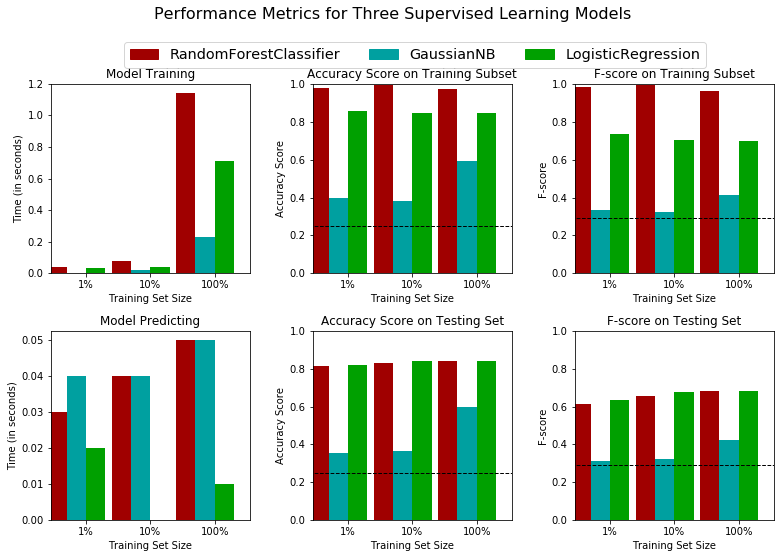

In [223]:
# Beta = 0.5

# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#min_samples_split=2
from sklearn.ensemble import AdaBoostClassifier
#base_estimator = DecisionTreeClassifier(max_depth=2), n_estimators = 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


# TODO: Initialize the three models
#clf_A = DecisionTreeClassifier(random_state= 42)
clf_A = LogisticRegression(random_state = 42)
clf_B = RandomForestClassifier(random_state = 42)
#clf_B = AdaBoostClassifier(random_state = 42, base_estimator = DecisionTreeClassifier())
clf_C = GaussianNB()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = round(len(y_train)*0.1)
samples_1 = round(len(y_train)*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [224]:
results

{'GaussianNB': {0: {'acc_test': 0.35179657269209508,
   'acc_train': 0.40000000000000002,
   'f_test': 0.31013434666826251,
   'f_train': 0.33333333333333331,
   'pred_time': 0.04,
   'train_time': 0.0},
  1: {'acc_test': 0.3660585959093422,
   'acc_train': 0.38333333333333336,
   'f_test': 0.32025811848355396,
   'f_train': 0.3250915750915751,
   'pred_time': 0.04,
   'train_time': 0.02},
  2: {'acc_test': 0.59767827529021555,
   'acc_train': 0.59333333333333338,
   'f_test': 0.42089895957560558,
   'f_train': 0.41249999999999998,
   'pred_time': 0.05,
   'train_time': 0.23}},
 'LogisticRegression': {0: {'acc_test': 0.82056384742951904,
   'acc_train': 0.85999999999999999,
   'f_test': 0.63369135104578855,
   'f_train': 0.73863636363636354,
   'pred_time': 0.02,
   'train_time': 0.03},
  1: {'acc_test': 0.83880597014925373,
   'acc_train': 0.84666666666666668,
   'f_test': 0.67809482478029737,
   'f_train': 0.703125,
   'pred_time': 0.0,
   'train_time': 0.04},
  2: {'acc_test': 0.841

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's **F-score**. 

### Question 3 - Choosing the Best Model

Q. Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
>Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set **when 100% of the training set is used**. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**
- I'd like to suggest to use 'RandomForest'. Let's say our data needs a **high precision** model because here detecting FP(but actually "<=50K") is important, thus our beta becomes 0.5 and and our beta0.5 score on the 100% full training dataset becomes the greatest(closest to '1') when we choose RandomForest as seen from the chart above. This choice is also legitimized by the accuracy score in the chart which is closest to '1'. When considering training time, RandomForest is perhaps not the best choice because of its complexity, but our dataset is not large enough to consider its training time. More importantly, our census dataset has  categorical features with multiple levels, and the target variable behaves differently based on the conditions of each categorical feature, thus we need Non-binary classification which cannot be done from using NaiveBayes or LogisticRegression. Of course because of its higher granularity in classifications, we should care about overfitting, which was already observed in the chart above from fitting on testing set. And we would need to tune its parameters to fix this issue. 

### Question 4 - Describing the Model in Layman's Terms

Q. In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**HINT:**
>When explaining your model, if using external resources please include all citations.

**Answer:**
- The RandomForest as a kind of Ensemble Methods picks some of the columns randomly then build a DecisionTree in those columns of the training set. Each DecisionTree uses a trick that lets a linear-Decision Surface do Non-Linear-Decision making. In short, when training each model, we ask questions such as "On what features do we make our decisions on?" "What is the threshold for classifying each question into a yes or no?" By keep adding an additional question and answering, we can produce decision surface and greater classify the Yes and No classes in a non-binary manner. 

- Here, the linear Decision Surfaces are produced by "analyzing the Entropy(for a parent and childs)values" of the data subsets and tells us where to split the data to make the subsets as pure as possible(to offer the maximum Information Gain that referring the biggest change of entropy between the parent and the children by certain candidate columns), then this forms a single tree. This is repeated and in the last stage, all trees built in this way vote and produce the final prediction.

- RandomForest is set of decision trees. Suppose if you have some fruits (apple, orange, lemon etc) you can tell the fruit name based on color, weight, taste etc. So for the above fruits if you say the size is small(for example less than 50g) and color is yellow then it is lemon.

We can use decision trees to predict the fruit based on different features(color, weight, taste etc).

Random Forest uses a lot of decision trees (say, an ensemble), where each tree a little bit different from the others. When we get a new fruit, we take the majority vote of the ensemble to get a final result.

So how are the trees different? Well,
  - We used random samples of the observations to train them (they've each seen only part of the data) , and
  - We used a subset of the features for each tree.

For example the first tree for the first choice may have to pick best classifier between age and education_num. The next decision branch gets to choose between two features independent of what any previous branches evaluated. This might be age and hours-per-week. It will pick the best split possible with those criteria. By default, a Random Forest will use the sqaure root of the number of features as the maximum features that it will look on any given branch. In our case we have total 13 features, so each decision will be the best of the 4(approximate) randomly selected features available.

From the given charity census data majority of the features are equally important and independent from one another. So it would be better to use RandomForestClassifier for better prediction of the data.

### Implementation: Model Tuning with GridSearch
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the **entire training set** for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$). 
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [225]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state = 42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth':[2,4,6,8,10], 'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8431
F-score on testing data: 0.6842

Optimized Model
------
Final accuracy score on the testing data: 0.8493
Final F-score on the testing data: 0.7121


### Question 5 - Final Model Evaluation

* Q. What is your optimized model's accuracy and F-score on the testing data? 
* Q. Are these scores better or worse than the unoptimized model? 
* Q. How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score | 0.84              | 0.85            |
| F-score        | 0.68              | 0.71            |

**Answer:**
- Our optimized model shows better accuracy and F-score than that of the unoptimized model. Comparing this result with the previous benchmark model, we can see how significantly our optimization attempt improves the model performance (from f-score 0.3 to f-score 0.7)

----
## Feature Importance**

An important task when performing supervised learning on a dataset like the census data we study here is determining **which features provide the most predictive power.** By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
Q. When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
- 1.'capital-gain'
- 2.'capital-loss'
- 3.'occupation'
- 4.'marital-status'
- 5.'race'

In general, as seen from the 'Exploring the data' section, in the variable 'capital-gain/loss', our target variable 'income' shows the most dramatic responses. And the variable 'capital-gain/loss' seems significantly affected by the variable 'occupation','marital-status' and 'race'. However, it is apparent that there are other variables that have strong interactions with those variables. 

Intuitively, 'Income' and 'capital-gain/loss' follows a strong correlation because when people have income, they tend to spend money for investment which brings capital gain/loss. 'Income' and 'occupation' might be related together because income varies by jobs. 'marital-status' could imply the doubled income. It is well known fact that there is a notable difference in income according to 'race', which should be discussed in the field of sociolgy.    

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that **ranks the importance of each feature** when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

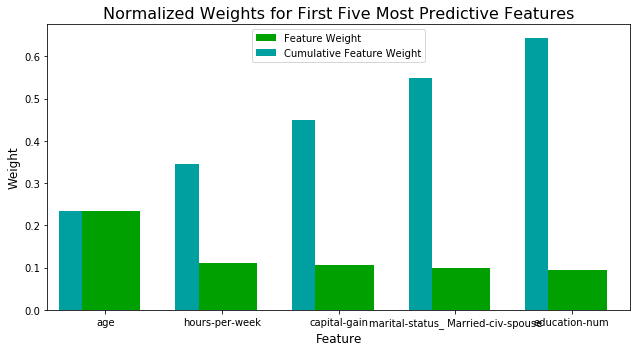

In [226]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  

Q. How do these five features compare to the five features you discussed in **Question 6**?

Q. If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?

**Answer:**
- I picked totally wrong variables 
  - (1.'capital-gain',2.'capital-loss',3.'occupation',4.'marital-status',5.'race') 
  - vs (1.'age',2.'hours-per-week',3.'capital-gain',4.'marital-status[Married-civ-spouse]',5.'education-num')

- I guess my intuition failed to address the accurate interactions between variables. It is obvious that there are significant and different interactions between each predictor. And the amount of influence of each predictor is apparently different. For example, my 'occupation' variable might behave similar to 'hours-per-week' because each occupation requires its own working hours. 'capital-loss' perhaps has nothing to do with 'income' because there are so many unimaginable, unexpected reasons that cause captal loss. 'Income' cannot be a predominant reason of 'capital-loss'. I thought 'education-num' is redundant because occupation' is also highly related to 'education-num' and because each occupation requires its own different schooling period. However, it turns out 'education-num' is more powerful predictor than 'occupation'. I think using 'feature importance' is absolutely great because my intuition cannot capture accurate quantified influences of each predictor. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [227]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8493
F-score on testing data: 0.7121

Final Model trained on reduced data
------
Accuracy on testing data: 0.8475
F-score on testing data: 0.7018


### Question 8 - Effects of Feature Selection

Q. How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?

Q. If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
- The scores on the reduced data become slightly worse.
- Of course, I'd use the reduced data because what we are losing here(the small performance degradation) is insignificant. 